 **TASK 1**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist #Loading the MNIST dataset using Tensorflow
(images,labels), (_, _) = mnist.load_data()
print(images.shape)
print(labels.shape) #printing the shape of both datasets

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


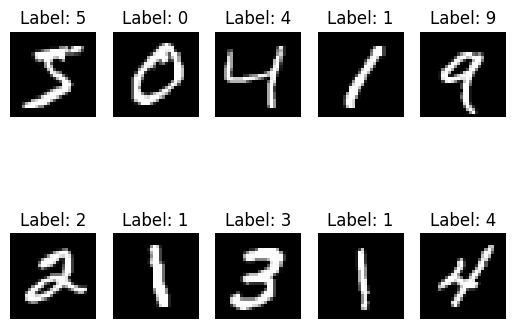

In [3]:
for i in range(10):
    plt.subplot(2,5, i + 1)
    plt.imshow(images[i],cmap="gray")
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show() #Exploring the 1st 10 images

In [4]:
images_flat = images.reshape((-1, 28 * 28)) # Flattening the images
images_normalized = images_flat / 255.0 # Normalizing pixel values to a range between 0 and 1

In [5]:
missing_values = pd.DataFrame(images_normalized).isnull().sum().sum()
print(f"Number of missing values: {missing_values}") #checking for missing values

Number of missing values: 0


In [6]:
label_distribution = pd.Series(labels).value_counts().sort_index()
print("Distribution of labels:")
print(label_distribution) # Displaying the label distributions as a pandas dataframe

Distribution of labels:
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64


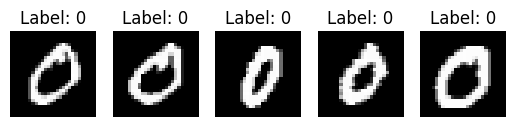

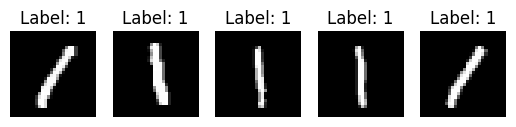

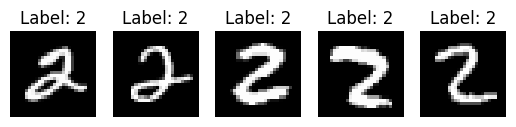

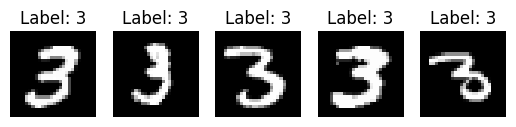

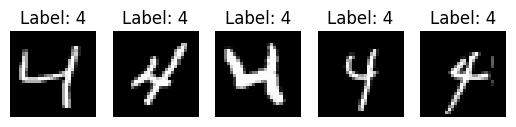

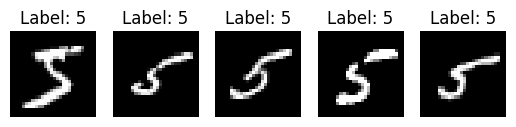

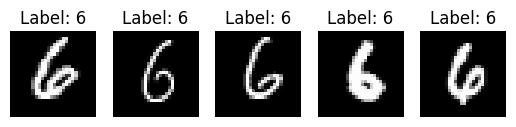

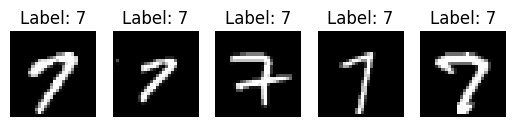

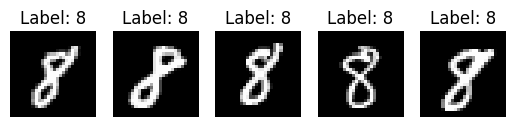

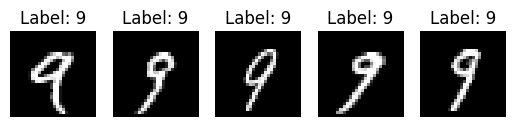

In [7]:
# Visualizing a few examples from each digit class.

for digit_class in range(10):
    class_indices = np.where(labels == digit_class)[0][:5]
    for i, idx in enumerate(class_indices):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    plt.show()

**TASK 2**

In [8]:
random_indices = np.random.randint(0, len(images), size=10)
random_indices

array([ 3327, 31176, 23798, 30919, 40312, 30269, 30274, 26325,  6039,
       55539])

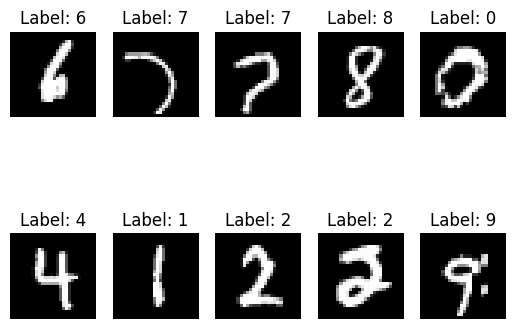

In [9]:
# Displaying a random sample of 10 images along with their true labels.
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[idx], cmap='gray')
    plt.title(f"Label: {labels[idx]}")
    plt.axis('off')
plt.show()

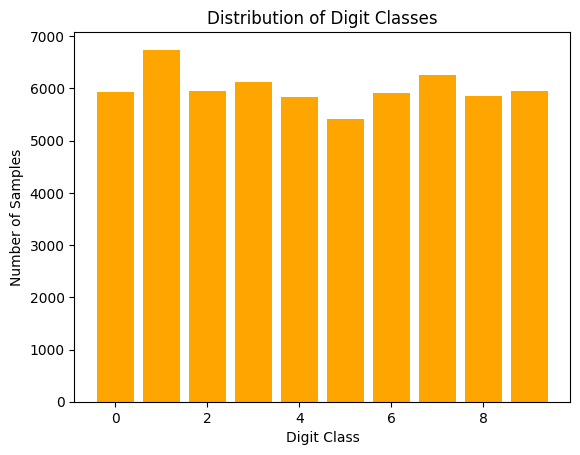

In [10]:
# Plotting the bar chart of digit classes
label_distribution = pd.Series(labels).value_counts().sort_index()
plt.bar(label_distribution.index, label_distribution.values, color='orange')
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Digit Classes')
plt.show()

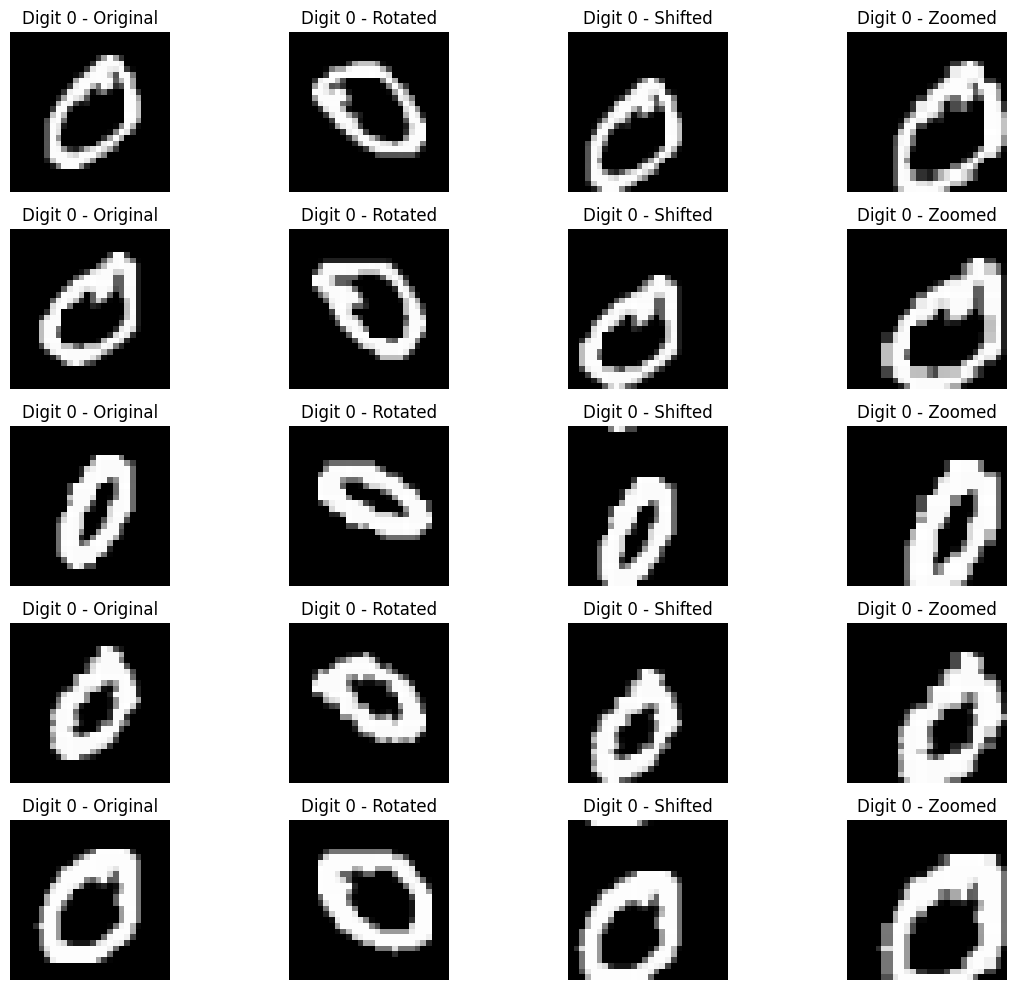

In [11]:
digit_class = np.random.randint(0,10)

# Get indices of the chosen digit in the training set
class_indices = np.where(labels == digit_class)[0][:5]

# Visualize augmented images for a specific digit
plt.figure(figsize=(12, 10))

for i, idx in enumerate(class_indices):

    # Get the original image
    original_img = images[idx]

    # Applying rotation by 90 degrees as through numpy we can only rotate the image in multiples of 90
    rotated_img = np.rot90(original_img, k=1)

    # Applying shift along x and y
    shift_amount_x = -3
    shift_amount_y = 4
    shifted_img = np.roll(original_img, shift_amount_x, axis=1)
    shifted_img = np.roll(shifted_img, shift_amount_y, axis=0)

    # Applying zoom of 1.2
    zoom_factor = 1.2
    zoomed_img = np.zeros_like(original_img)
    for c in range(original_img.shape[0]):
        for r in range(original_img.shape[1]):
            new_c = int(c / zoom_factor)
            new_r = int(r / zoom_factor)
            if 0 <= new_c < original_img.shape[0] and 0 <= new_r < original_img.shape[1]:
                zoomed_img[c, r] = original_img[new_c, new_r]

    # Displaying the original image
    plt.subplot(5, 4, i * 4 + 1)
    plt.imshow(original_img, cmap='gray')
    plt.title(f"Digit {digit_class} - Original")
    plt.axis('off')

    # Displaying the rotated image
    plt.subplot(5, 4, i * 4 + 2)
    plt.imshow(rotated_img, cmap='gray')
    plt.title(f"Digit {digit_class} - Rotated")
    plt.axis('off')

    # Displaying the shifted image
    plt.subplot(5, 4, i * 4 + 3)
    plt.imshow(shifted_img, cmap='gray')
    plt.title(f"Digit {digit_class} - Shifted")
    plt.axis('off')

    # Displaying the zoomed image
    plt.subplot(5, 4, i * 4 + 4)
    plt.imshow(zoomed_img, cmap='gray')
    plt.title(f"Digit {digit_class} - Zoomed")
    plt.axis('off')

plt.tight_layout()
plt.show()


**TASK 3**

In [12]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define the data transformations
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to the range [-1, 1]
])

# Load the MNIST dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(mnist_dataset))
test_size = len(mnist_dataset) - train_size
train_dataset, test_dataset = random_split(mnist_dataset, [train_size, test_size])

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 165617849.55it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 39573895.40it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42658298.92it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21501725.47it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [13]:
import torch.nn as nn
import torch.optim as optim

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

print("Training finished.")


Epoch 1/5, Loss: 0.18306798439038297
Epoch 2/5, Loss: 0.050641775196728606
Epoch 3/5, Loss: 0.034079149302638445
Epoch 4/5, Loss: 0.024525926958459118
Epoch 5/5, Loss: 0.020043361211195588
Training finished.


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Assuming the model, test_loader, and device are defined as in the previous code

# Set the model to evaluation mode
model.eval()

# Initialize lists to store predicted and true labels
all_preds = []
all_labels = []

# Evaluate the model on the testing set
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


Accuracy: 98.99%


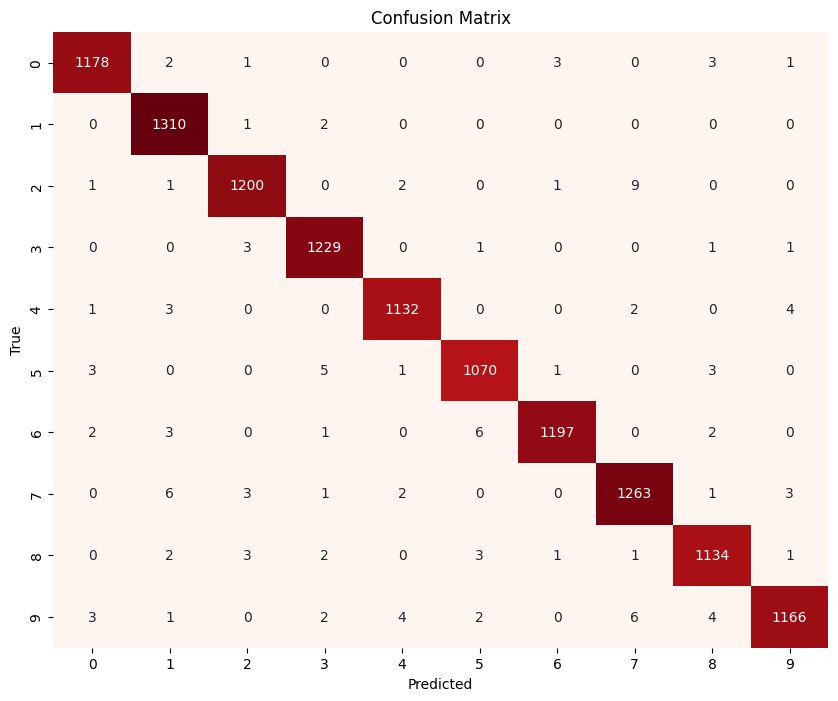

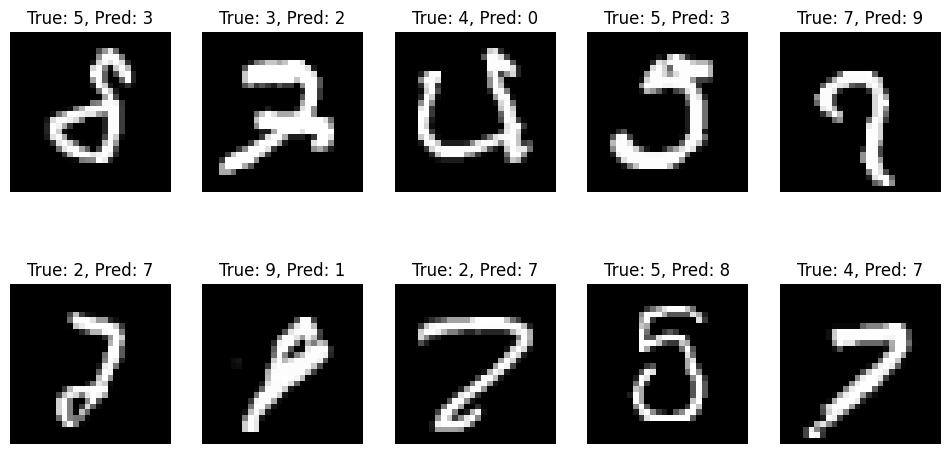

In [15]:
# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Create a confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualize some misclassified images
misclassified_indices = [i for i, (true_label, pred_label) in enumerate(zip(all_labels, all_preds)) if true_label != pred_label]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_dataset[idx][0][0], cmap='gray')
    plt.title(f"True: {all_labels[idx]}, Pred: {all_preds[idx]}")
    plt.axis('off')

plt.show()

**BONUS-TRANSFER LEARNING USING RESNET18**

In [ ]:
from torchvision import transforms, datasets, models

# Set random seed for reproducibility
torch.manual_seed(42)

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # Convert to RGB
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Load pre-trained ResNet model
resnet_model = models.resnet18(pretrained=True)

# Modify the final fully connected layer for 10 classes
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs, 10)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model.to(device)

for epoch in range(num_epochs):
    resnet_model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Evaluation
resnet_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on the test set: {accuracy}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 170MB/s]


Epoch 1/5, Loss: 0.07603447337344599
Epoch 2/5, Loss: 0.04253594584985791
Epoch 3/5, Loss: 0.03333411267802973
Epoch 4/5, Loss: 0.02769240923476852
Epoch 5/5, Loss: 0.022861366633524692
Accuracy on the test set: 0.9936
